In [115]:
#cài đặt các thư viện cần thiết
# !pip install pandas
# !pip install matplotlib
# !pip install regex
# !pip install pyvi
# !pip install seaborn
# !pip install sklearn
# !pip install wordcloud
# !pip install bs4
# !pip install requests

In [40]:
#import thư viện
import pandas as pd
from pyvi import ViTokenizer
import regex as re
import seaborn as sns
import numpy as np

In [41]:
#đọc file dữ liệu
news_dataset = pd.read_excel('news.xlsx')
news_dataset

,STT,Tiêu đề,Tác giả,Nội dung,Nhãn
0,1,Thiên Ân có cơ hội vào top 20 Miss Grand Inter...,Tân Cao,Người đẹp Đoàn Thiên Ân vượt thí sinh Thái Lan...,1
1,2,BẠN THÂN NHÀ NGƯỜI TA CHẤT LƯỢNG THẬT,Theanh28 Entertainment,"Cụ thể, trong đoạn clip được ghi lại, có thể t...",0
2,3,Sao 'The Flash' đối mặt án tù 26 năm,Phương Mai,Tài tử Ezra Miller từ chối thỏa thuận đầu thú ...,1
3,4,HN: Dân hoang mang vì tin đồn sữa có đỉa,Dương Tùng (24h.com.vn),"Những ngày gần đây, một số huyện ngoại thành H...",0
4,5,20 ngày Bảo Ngọc thi Hoa hậu Liên lục địa,Tân Cao,"Bảo Ngọc nổi bật với chiều cao 1,85 mét, tự ti...",1
...,...,...,...,...,...
440,441,Ca sỹ Tuấn Hưng được UBND quận Hoàn Kiếm cấp p...,Theanh28,"Hai tuần sau khi bị phạt 12,5 triệu đồng do tự...",1
441,442,TRƯỜNG THCS LÊ QUÝ ĐÔN CẤM THU TẤT CẢ CÁC LOẠI...,Theanh28,"Mới đây, trên các diễn đàn và mạng xã hội lan ...",1
442,443,"CHỦ NHÀ SEA GAMES 32 CHỐT MÔN THI ĐẤU, ĐẶT QUY...",Theanh28,"Truyền thông Campuchia đưa tin, quốc gia này đ...",1
443,444,ĐT NGA KHÔNG ĐƯỢC THAM DỰ EURO 2024,Theanh28,Sau khi bị FIFA cho loại trong lượt trận tranh...,1


In [42]:
#vì cột stt không hữu ích trong việc xác định tin thực. Vì vậy sẽ loại bỏ cột này
news_dataset = news_dataset.drop(['STT'], axis = 1)
news_dataset

,Tiêu đề,Tác giả,Nội dung,Nhãn
0,Thiên Ân có cơ hội vào top 20 Miss Grand Inter...,Tân Cao,Người đẹp Đoàn Thiên Ân vượt thí sinh Thái Lan...,1
1,BẠN THÂN NHÀ NGƯỜI TA CHẤT LƯỢNG THẬT,Theanh28 Entertainment,"Cụ thể, trong đoạn clip được ghi lại, có thể t...",0
2,Sao 'The Flash' đối mặt án tù 26 năm,Phương Mai,Tài tử Ezra Miller từ chối thỏa thuận đầu thú ...,1
3,HN: Dân hoang mang vì tin đồn sữa có đỉa,Dương Tùng (24h.com.vn),"Những ngày gần đây, một số huyện ngoại thành H...",0
4,20 ngày Bảo Ngọc thi Hoa hậu Liên lục địa,Tân Cao,"Bảo Ngọc nổi bật với chiều cao 1,85 mét, tự ti...",1
...,...,...,...,...
440,Ca sỹ Tuấn Hưng được UBND quận Hoàn Kiếm cấp p...,Theanh28,"Hai tuần sau khi bị phạt 12,5 triệu đồng do tự...",1
441,TRƯỜNG THCS LÊ QUÝ ĐÔN CẤM THU TẤT CẢ CÁC LOẠI...,Theanh28,"Mới đây, trên các diễn đàn và mạng xã hội lan ...",1
442,"CHỦ NHÀ SEA GAMES 32 CHỐT MÔN THI ĐẤU, ĐẶT QUY...",Theanh28,"Truyền thông Campuchia đưa tin, quốc gia này đ...",1
443,ĐT NGA KHÔNG ĐƯỢC THAM DỰ EURO 2024,Theanh28,Sau khi bị FIFA cho loại trong lượt trận tranh...,1


In [43]:
#kiểm tra missing data
news_dataset.isnull().sum()

Tiêu đề      3
Tác giả     15
Nội dung     0
Nhãn         0
dtype: int64

In [44]:
#xử lý missing data
#thay thế các giá trị NaN trong cột tác giả thành chuỗi null
news_dataset['Tác giả'] = news_dataset['Tác giả'].replace(np.nan, '')
#thay thê các giá trị NaN trong cột Tiêu đề thành câu đầu tiên trong cột Nội dung
for i in range(0, news_dataset.shape[0]):
    if(pd.isna(news_dataset['Tiêu đề'][i])):
        news_dataset['Tiêu đề'][i] = list(news_dataset['Nội dung'][i].split('.'))[0]
#kiểm tra lại missing data
news_dataset.isnull().sum()


C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\655128731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = list(news_dataset['Nội dung'][i].split('.'))[0]


Tiêu đề     0
Tác giả     0
Nội dung    0
Nhãn        0
dtype: int64

In [45]:
#xáo trộn tập dữ liệu để ngăn mô hình bị sai lệch
news_dataset = news_dataset.sample(frac=1)
news_dataset.reset_index(inplace=True)
#xoá cột index vì nó không hữu ích cho việc phân tích
news_dataset.drop(["index"], axis=1, inplace=True)
news_dataset

,Tiêu đề,Tác giả,Nội dung,Nhãn
0,Hàng nghìn nhà trẻ ở Hàn Quốc đóng cửa vì ngườ...,Theanh28,"Ngày 26/10, Cơ quan Thống kê Hàn Quốc (KOSTAT)...",1
1,ANTONY ĐÁP TRẢ LỜI NÓI CỦA HUYỀN THOẠI PAUL SC...,Theanh28,Sau khi Paul Scholes chia sẻ pha quay bóng 720...,1
2,Hơn 100 công nhân bị nợ lương,Hoàng Nam,"Nhiều lao động tại xã Tân Ninh, huyện Tân Thạn...",1
3,Rau VietGAP phải bán giá chợ,,"Không vào được siêu thị, nhiều năm nay nông dâ...",1
4,HLV Park Hang Seo chính thức chia tay ĐT Việt ...,Theanh28,Liên đoàn Bóng đá Việt Nam (LĐBĐVN) và HLV trư...,1
...,...,...,...,...
440,Nhiều quận huyện TP HCM bị cắt nước cuối tuần,Thái Anh,Nước ở 8 quận huyện tại thành phố bị cắt hoặc ...,1
441,Công nhân thiếu chỗ gửi con,Hồng Chiêu,"Thiếu trường công, chi phí trường tư cao, nhiề...",1
442,Nhà trai ngồi xích lô hỏi cưới hoa hậu Đỗ Mỹ L...,Tân Cao,"Doanh nhân Đỗ Vinh Quang, con trai ""bầu Hiển"",...",1
443,TP. HCM sẽ “biến mất” trong năm 2030,Việt Tân \n,TP. HCM sẽ “biến mất” trong năm 2030. Hy vọng ...,0


<AxesSubplot:xlabel='Nhãn', ylabel='count'>

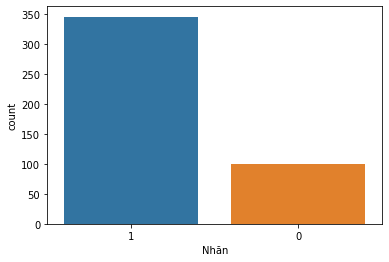

In [46]:
#xem các giá trị đại diện cho tin thật và giả(1 là tin thật, 0 là tin giả)
sns.countplot(data= news_dataset, x = 'Nhãn', order=news_dataset['Nhãn'].value_counts().index)

In [47]:
#xử lý dữ liệu Tiếng Việt
#chuẩn hoá Unicode Tiếng Việt (đưa về 1 chuẩn Unicode dựng sẵn)
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

def text_preprocess(document):
    # chuẩn hóa unicode
    document = convert_unicode(document)
    # tách từ(từ đơn và từ ghép)
    document = ViTokenizer.tokenize(document)
    # đưa về chữ viết thường
    document = document.lower()
    #loại bỏ ký tự đặc biệt
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

        #Thực hiện xử lý dữ liệu với từng cột trong tập dữ liệu
for i in range(0, len(news_dataset['Tiêu đề'])):
    news_dataset['Tiêu đề'][i] = text_preprocess(news_dataset['Tiêu đề'][i])
for i in range(0, len(news_dataset['Tác giả'])):
    news_dataset['Tác giả'][i] = text_preprocess(news_dataset['Tác giả'][i])
for i in range(0, len(news_dataset['Nội dung'])):
    news_dataset['Nội dung'][i] = text_preprocess(news_dataset['Nội dung'][i])

news_dataset

C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\2265512805.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = text_preprocess(news_dataset['Tiêu đề'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\2265512805.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tác giả'][i] = text_preprocess(news_dataset['Tác giả'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\2265512805.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Tiêu đề,Tác giả,Nội dung,Nhãn
0,hàng nghìn nhà_trẻ ở hàn_quốc đóng_cửa vì ngườ...,theanh28,ngày 26 10 cơ_quan thống_kê hàn_quốc kostat cô...,1
1,antony đáp trả_lời_nói của huyền_thoại paul sc...,theanh28,sau khi paul_scholes chia_sẻ pha quay bóng 720...,1
2,hơn 100 công_nhân bị nợ lương,hoàng_nam,nhiều lao_động tại xã tân_ninh huyện tân_thạnh...,1
3,rau vietgap phải bán giá_chợ,,không vào được siêu_thị nhiều năm nay nông_dân...,1
4,hlv park_hang_seo chính_thức chia_tay đt việt_...,theanh28,liên_đoàn bóng_đá việt_nam lđbđvn và hlv trưởn...,1
...,...,...,...,...
440,nhiều quận huyện tp hcm bị cắt nước cuối tuần,thái_anh,nước ở 8 quận huyện tại thành_phố bị cắt hoặc ...,1
441,công_nhân thiếu chỗ gửi con,hồng_chiêu,thiếu trường công chi_phí trường tư cao nhiều ...,1
442,nhà_trai ngồi xích_lô hỏi cưới hoa_hậu đỗ_mỹ_linh,tân_cao,doanh_nhân đỗ vinh_quang con_trai bầu hiển cùn...,1
443,tp hcm sẽ biến mất trong năm 2030,việt_tân,tp hcm sẽ biến mất trong năm 2030 hy_vọng tên ...,0


In [48]:
# Tìm các stopword
dict = {}
#đếm từ trong các cột Tiêu đề, Tác giả, Nội dung
for i in news_dataset['Tiêu đề']:
    for x in i.split():
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1  
for i in news_dataset['Tác giả']:
    for x in i.split():
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1              
for i in news_dataset['Nội dung']:
    for x in i.split():
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1                        
#sắp xếp các từ theo thứ tự giảm dần
a = sorted(dict.items(), key = lambda x: -x[1])
print(a)
#lấy ra các từ có số lần xuất hiện lớn hơn 100 là các stopword và đưa vào một tập hợp stopword
stopword = set()
for i in a:
    if i[1] >= 100:
        stopword.add(i[0])
    else:
        break
stopword    

[('của', 396), ('là', 320), ('và', 294), ('có', 270), ('người', 263), ('đã', 240), ('không', 234), ('được', 231), ('cho', 218), ('ở', 207), ('một', 203), ('trong', 202), ('các', 182), ('với', 177), ('khi', 171), ('năm', 160), ('để', 159), ('sau', 147), ('về', 142), ('nhiều', 132), ('này', 131), ('những', 121), ('việt_nam', 120), ('tại', 117), ('bị', 112), ('vào', 112), ('ông', 111), ('lại', 110), ('đi', 109), ('đến', 109), ('nhà', 107), ('từ', 107), ('anh', 103), ('ra', 103), ('cũng', 103), ('1', 101), ('cô', 100), ('bạn', 99), ('sẽ', 98), ('trên', 98), ('nhưng', 98), ('2', 95), ('vì', 92), ('10', 92), ('mà', 92), ('ngày', 92), ('thì', 92), ('hơn', 84), ('đó', 82), ('làm', 80), ('theanh28', 79), ('theo', 78), ('còn', 77), ('tuổi', 76), ('chỉ', 76), ('tiền', 73), ('mới', 72), ('trước', 72), ('con', 70), ('biết', 70), ('triệu', 69), ('như', 69), ('phải', 68), ('đang', 67), ('nước', 63), ('hai', 62), ('2022', 62), ('dân', 61), ('lao_động', 61), ('đồng', 60), ('nhất', 59), ('tp', 59), ('mì

{'1',
 'anh',
 'bị',
 'cho',
 'các',
 'có',
 'cô',
 'cũng',
 'của',
 'khi',
 'không',
 'là',
 'lại',
 'một',
 'người',
 'nhiều',
 'nhà',
 'những',
 'này',
 'năm',
 'ra',
 'sau',
 'trong',
 'tại',
 'từ',
 'việt_nam',
 'và',
 'vào',
 'về',
 'với',
 'ông',
 'đi',
 'đã',
 'được',
 'đến',
 'để',
 'ở'}

In [49]:
#loại bỏ stopword khỏi dữ liệu
def remove_stopwords(document):
    words = []
    for word in document.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

for i in range(0, len(news_dataset['Tiêu đề'])):
    news_dataset['Tiêu đề'][i] = remove_stopwords(news_dataset['Tiêu đề'][i])
for i in range(0, len(news_dataset['Tác giả'])):
    news_dataset['Tác giả'][i] = remove_stopwords(news_dataset['Tác giả'][i])    
for i in range(0, len(news_dataset['Nội dung'])):
    news_dataset['Nội dung'][i] = remove_stopwords(news_dataset['Nội dung'][i])

news_dataset

C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\308898851.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = remove_stopwords(news_dataset['Tiêu đề'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\308898851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tác giả'][i] = remove_stopwords(news_dataset['Tác giả'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_18588\308898851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Tiêu đề,Tác giả,Nội dung,Nhãn
0,hàng nghìn nhà_trẻ hàn_quốc đóng_cửa vì dân ch...,theanh28,ngày 26 10 cơ_quan thống_kê hàn_quốc kostat cô...,1
1,antony đáp trả_lời_nói huyền_thoại paul scholes,theanh28,paul_scholes chia_sẻ pha quay bóng 720 độ anto...,1
2,hơn 100 công_nhân nợ lương,hoàng_nam,lao_động xã tân_ninh huyện tân_thạnh nợ lương ...,1
3,rau vietgap phải bán giá_chợ,,siêu_thị nay nông_dân trồng rau xã văn_đức huy...,1
4,hlv park_hang_seo chính_thức chia_tay đt 5 dẫn...,theanh28,liên_đoàn bóng_đá lđbđvn hlv trưởng đtqg park_...,1
...,...,...,...,...
440,quận huyện tp hcm cắt nước cuối tuần,thái_anh,nước 8 quận huyện thành_phố cắt hoặc yếu đêm 1...,1
441,công_nhân thiếu chỗ gửi con,hồng_chiêu,thiếu trường công chi_phí trường tư cao công_n...,1
442,nhà_trai ngồi xích_lô hỏi cưới hoa_hậu đỗ_mỹ_linh,tân_cao,doanh_nhân đỗ vinh_quang con_trai bầu hiển cùn...,1
443,tp hcm sẽ biến mất 2030,việt_tân,tp hcm sẽ biến mất 2030 hy_vọng tên sài_gòn sẽ...,0


In [50]:
#hợp nhất các cột Tiêu đề, Tác giả, Nội dung thành một cột Nội dung duy nhất
news_dataset['Nội dung'] =  + news_dataset['Tiêu đề'] + ' ' + news_dataset['Tác giả'] + ' ' + news_dataset['Nội dung']
news_dataset = news_dataset.drop(['Tiêu đề', 'Tác giả'], axis=1)
news_dataset

,Nội dung,Nhãn
0,hàng nghìn nhà_trẻ hàn_quốc đóng_cửa vì dân ch...,1
1,antony đáp trả_lời_nói huyền_thoại paul schole...,1
2,hơn 100 công_nhân nợ lương hoàng_nam lao_động ...,1
3,rau vietgap phải bán giá_chợ siêu_thị nay nôn...,1
4,hlv park_hang_seo chính_thức chia_tay đt 5 dẫn...,1
...,...,...
440,quận huyện tp hcm cắt nước cuối tuần thái_anh ...,1
441,công_nhân thiếu chỗ gửi con hồng_chiêu thiếu t...,1
442,nhà_trai ngồi xích_lô hỏi cưới hoa_hậu đỗ_mỹ_l...,1
443,tp hcm sẽ biến mất 2030 việt_tân tp hcm sẽ biế...,0
